In [21]:
from custom_ml import *

In [8]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
from nltk.corpus import movie_reviews

sentences = []
for s in movie_reviews.sents():
    s.insert(0, "SS")
    s.append("SE")
    if len(s) > 4:
        sentences.append(s)

In [10]:
from collections import Counter

def calculate_bigram(sentences):
    bigram = {}
    for s in sentences:
        context = "SS"
        for i, w in enumerate(s[1:]):
            if context not in bigram:
                bigram[context] = Counter()
            if bigram[context][w] == 0:
                bigram[context][w] = 1
            bigram[context][w] += 1
            context = w
    for context in bigram.keys():
        total = sum(bigram[context].values())
        for w in bigram[context]:
            bigram[context][w] /= total
    return bigram

In [11]:
def sentence_score(s):
    p = 0.0
    for i in range(len(s) - 1):
        c = s[i]
        w = s[i + 1]
        p += np.log(bigram[c][w] + np.finfo(float).eps)
    return np.exp(p)

In [14]:
bigram = calculate_bigram(sentences)

In [15]:
def generate_sentence(seed=None):
    if seed is not None:
        np.random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in bigram:
            break
        words, probs = zip(*[(k, v) for k, v in bigram[c].items()])
        idx = np.argmax(np.random.multinomial(1, probs, (1,)))
        w = words[idx]
        
        if w == "SE":
            break
        elif w in ["i", "ii", "iii"]:
            w2 = w.upper()
        elif w in ["mr", "luc", "i", "robin", "williams", "cindy", "crawford"]:
            w2 = w.title()
        else:
            w2 = w
        
        if c == "SS":
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]:
            sentence.append(w2)
        elif w in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2)
            
        c = w
    return "".join(sentence)

In [19]:
generate_sentence(5)

'The trade, which also has episodes, muddled it is looking best things: side - attractive, but he is responsible but as she meets tom cruise to watch people.'

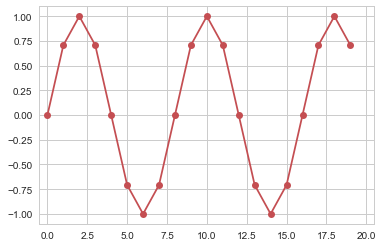

In [22]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

In [25]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [26]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [27]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3, 1)))
model.add(Dense(1, activation="linear"))
model.compile(loss='mse', optimizer='sgd')

Using TensorFlow backend.


In [28]:
history = model.fit(X_train, Y_train, epochs=100, verbose=0)

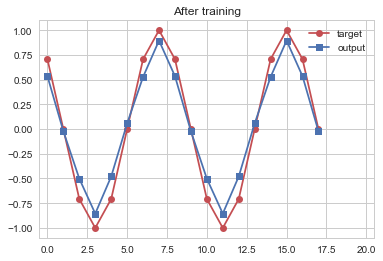

In [29]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()